In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
products=pd.read_csv(r"C:\Users\jjj\Downloads\products.csv.zip")
payments=pd.read_csv(r"C:\Users\jjj\Downloads\payments.csv.zip")
orders=pd.read_csv(r"C:\Users\jjj\Downloads\orders.csv.zip")
order_items=pd.read_csv(r"C:\Users\jjj\Downloads\order_items.csv.zip")
geo_location=pd.read_csv(r"C:\Users\jjj\Downloads\geolocation.csv.zip")
customers=pd.read_csv(r"C:\Users\jjj\Downloads\customers.csv.zip")
sellers=pd.read_csv(r"C:\Users\jjj\Downloads\sellers.csv")


In [35]:
products.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
products.isnull().sum()

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
products.shape

(32951, 9)

In [38]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
payments.shape

(103886, 5)

In [40]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [43]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [44]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [46]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [47]:
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [48]:
geo_location.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [49]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [50]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [51]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [52]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#####  1. List all unique cities where customers are located

In [53]:
customers['customer_city'].unique() #we can get the city name as sorted by using sorted()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

#####  2. Count the number of orders placed in 2017

In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [55]:

# 1. Convert to datetime format
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_timestamp_year']=orders['order_purchase_timestamp'].dt.year
# 2. Extract the year
# Now 'year_column' contains the year extracted from the original column

In [56]:
orders['order_purchase_timestamp_year'].value_counts()[2017]

45101

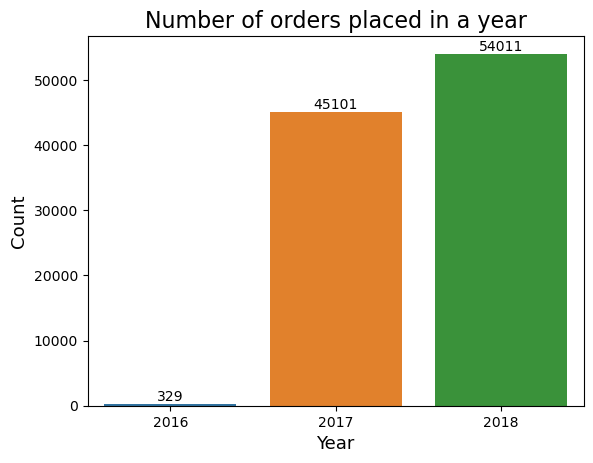

In [57]:
a=sns.countplot(x='order_purchase_timestamp_year',data=orders)
plt.title('Number of orders placed in a year',color='Black',fontsize=16)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Count',fontsize=13)
for bars in a.containers:
    a.bar_label(bars)
plt.show()

##### 3. Find the  sum of sales per category.
 

In [58]:
payments1 = payments.merge(order_items, on='order_id', how='inner')
sum_sales=payments1.merge(products,on='product_id',how='inner')


In [59]:
sum_sales.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,Casa Construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,Casa Construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotive,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,11.90,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


In [60]:
sum_sales.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product category', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [61]:
sum_sales_per_category=sum_sales.groupby('product category')['price'].sum().nlargest(10)
sum_sales_per_category

product category
HEALTH BEAUTY           1297355.80
Watches present         1253143.30
bed table bath          1092551.02
sport leisure           1023996.34
computer accessories     942277.57
Furniture Decoration     765093.89
housewares               666587.00
Cool Stuff               662309.49
automotive               616752.51
Garden tools             518217.54
Name: price, dtype: float64

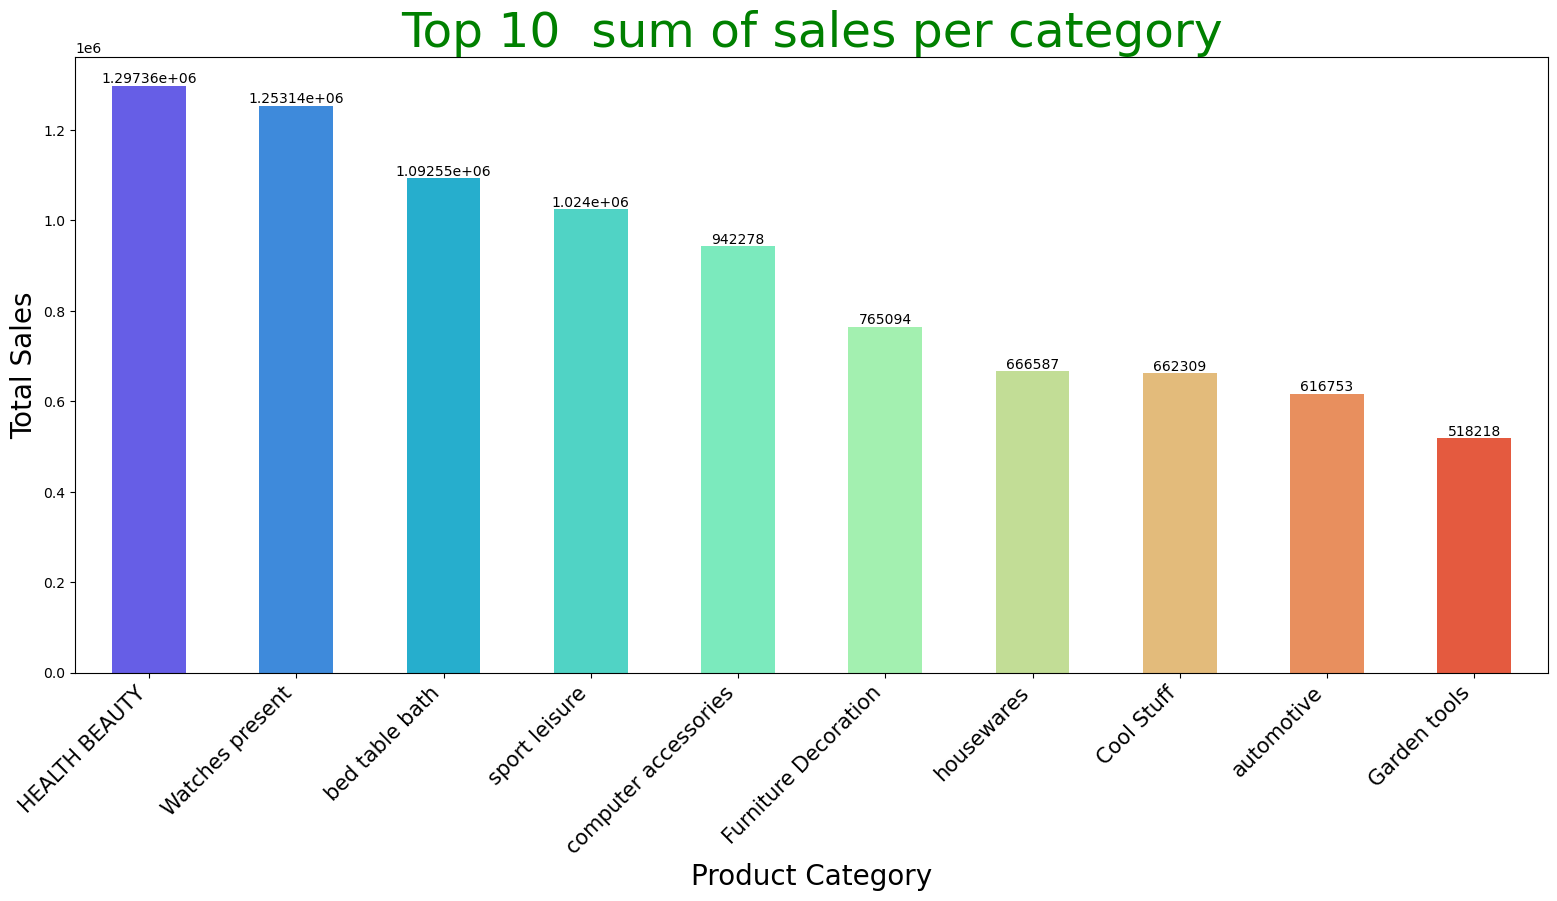

In [62]:
from matplotlib import style
plt.figure(figsize=(19,8))
ax=sns.barplot(x=sum_sales_per_category.index,y=sum_sales_per_category.values,palette='rainbow',width=0.5)
style.use('ggplot')
plt.title('Top 10  sum of sales per category',fontsize=35,color='green')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=15)
plt.xlabel('Product Category',fontsize=20,color='black')
plt.ylabel('Total Sales',fontsize=20,color='black')
for bars in ax.containers:
    ax.bar_label(bars)


#####  3. Find the total sales per category

In [63]:
# Least 10 Sales per category
total_sales_per_category_s=products['product category'].value_counts().nsmallest(10)
total_sales_per_category_s

product category
cds music dvds                      1
insurance and services              2
PC Gamer                            3
Fashion Children's Clothing         5
House Comfort 2                     5
IMAGE IMPORT TABLETS                9
La Cuisine                         10
Kitchen portable and food coach    10
CITTE AND UPHACK FURNITURE         10
Hygiene diapers                    12
Name: count, dtype: int64

In [64]:
# Top 10 Sales per category
total_sales_per_category=products['product category'].value_counts().nlargest(10)
total_sales_per_category

product category
bed table bath          3029
sport leisure           2867
Furniture Decoration    2657
HEALTH BEAUTY           2444
housewares              2335
automotive              1900
computer accessories    1639
toys                    1411
Watches present         1329
telephony               1134
Name: count, dtype: int64

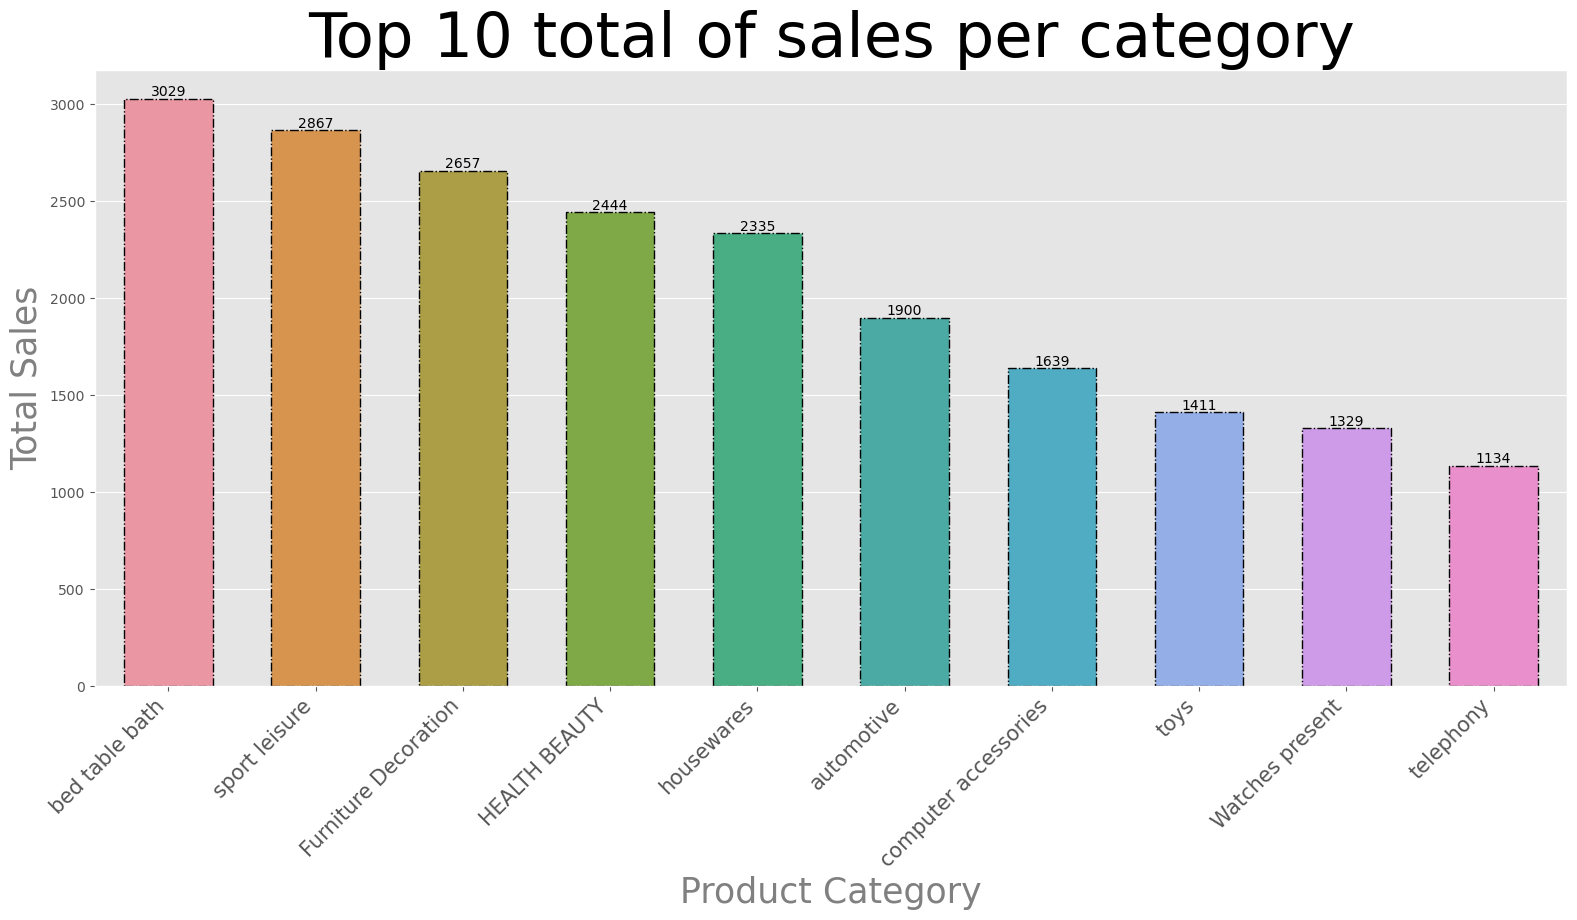

In [65]:
plt.figure(figsize=(19,8))
ax=sns.barplot(x=total_sales_per_category.index,y=total_sales_per_category.values,width=0.6,edgecolor='black',linewidth=1,linestyle="dashdot")
plt.title('Top 10 total of sales per category',fontsize=45,color='black')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=15)
plt.xlabel('Product Category',fontsize=25,color='gray')
plt.ylabel('Total Sales',fontsize=25,color='gray')
for bars in ax.containers:
    ax.bar_label(bars)

In [66]:
# Total sales per category
total_sales_per_category=products['product category'].value_counts()
total_sales_per_category

product category
bed table bath                 3029
sport leisure                  2867
Furniture Decoration           2657
HEALTH BEAUTY                  2444
housewares                     2335
                               ... 
Fashion Children's Clothing       5
House Comfort 2                   5
PC Gamer                          3
insurance and services            2
cds music dvds                    1
Name: count, Length: 73, dtype: int64

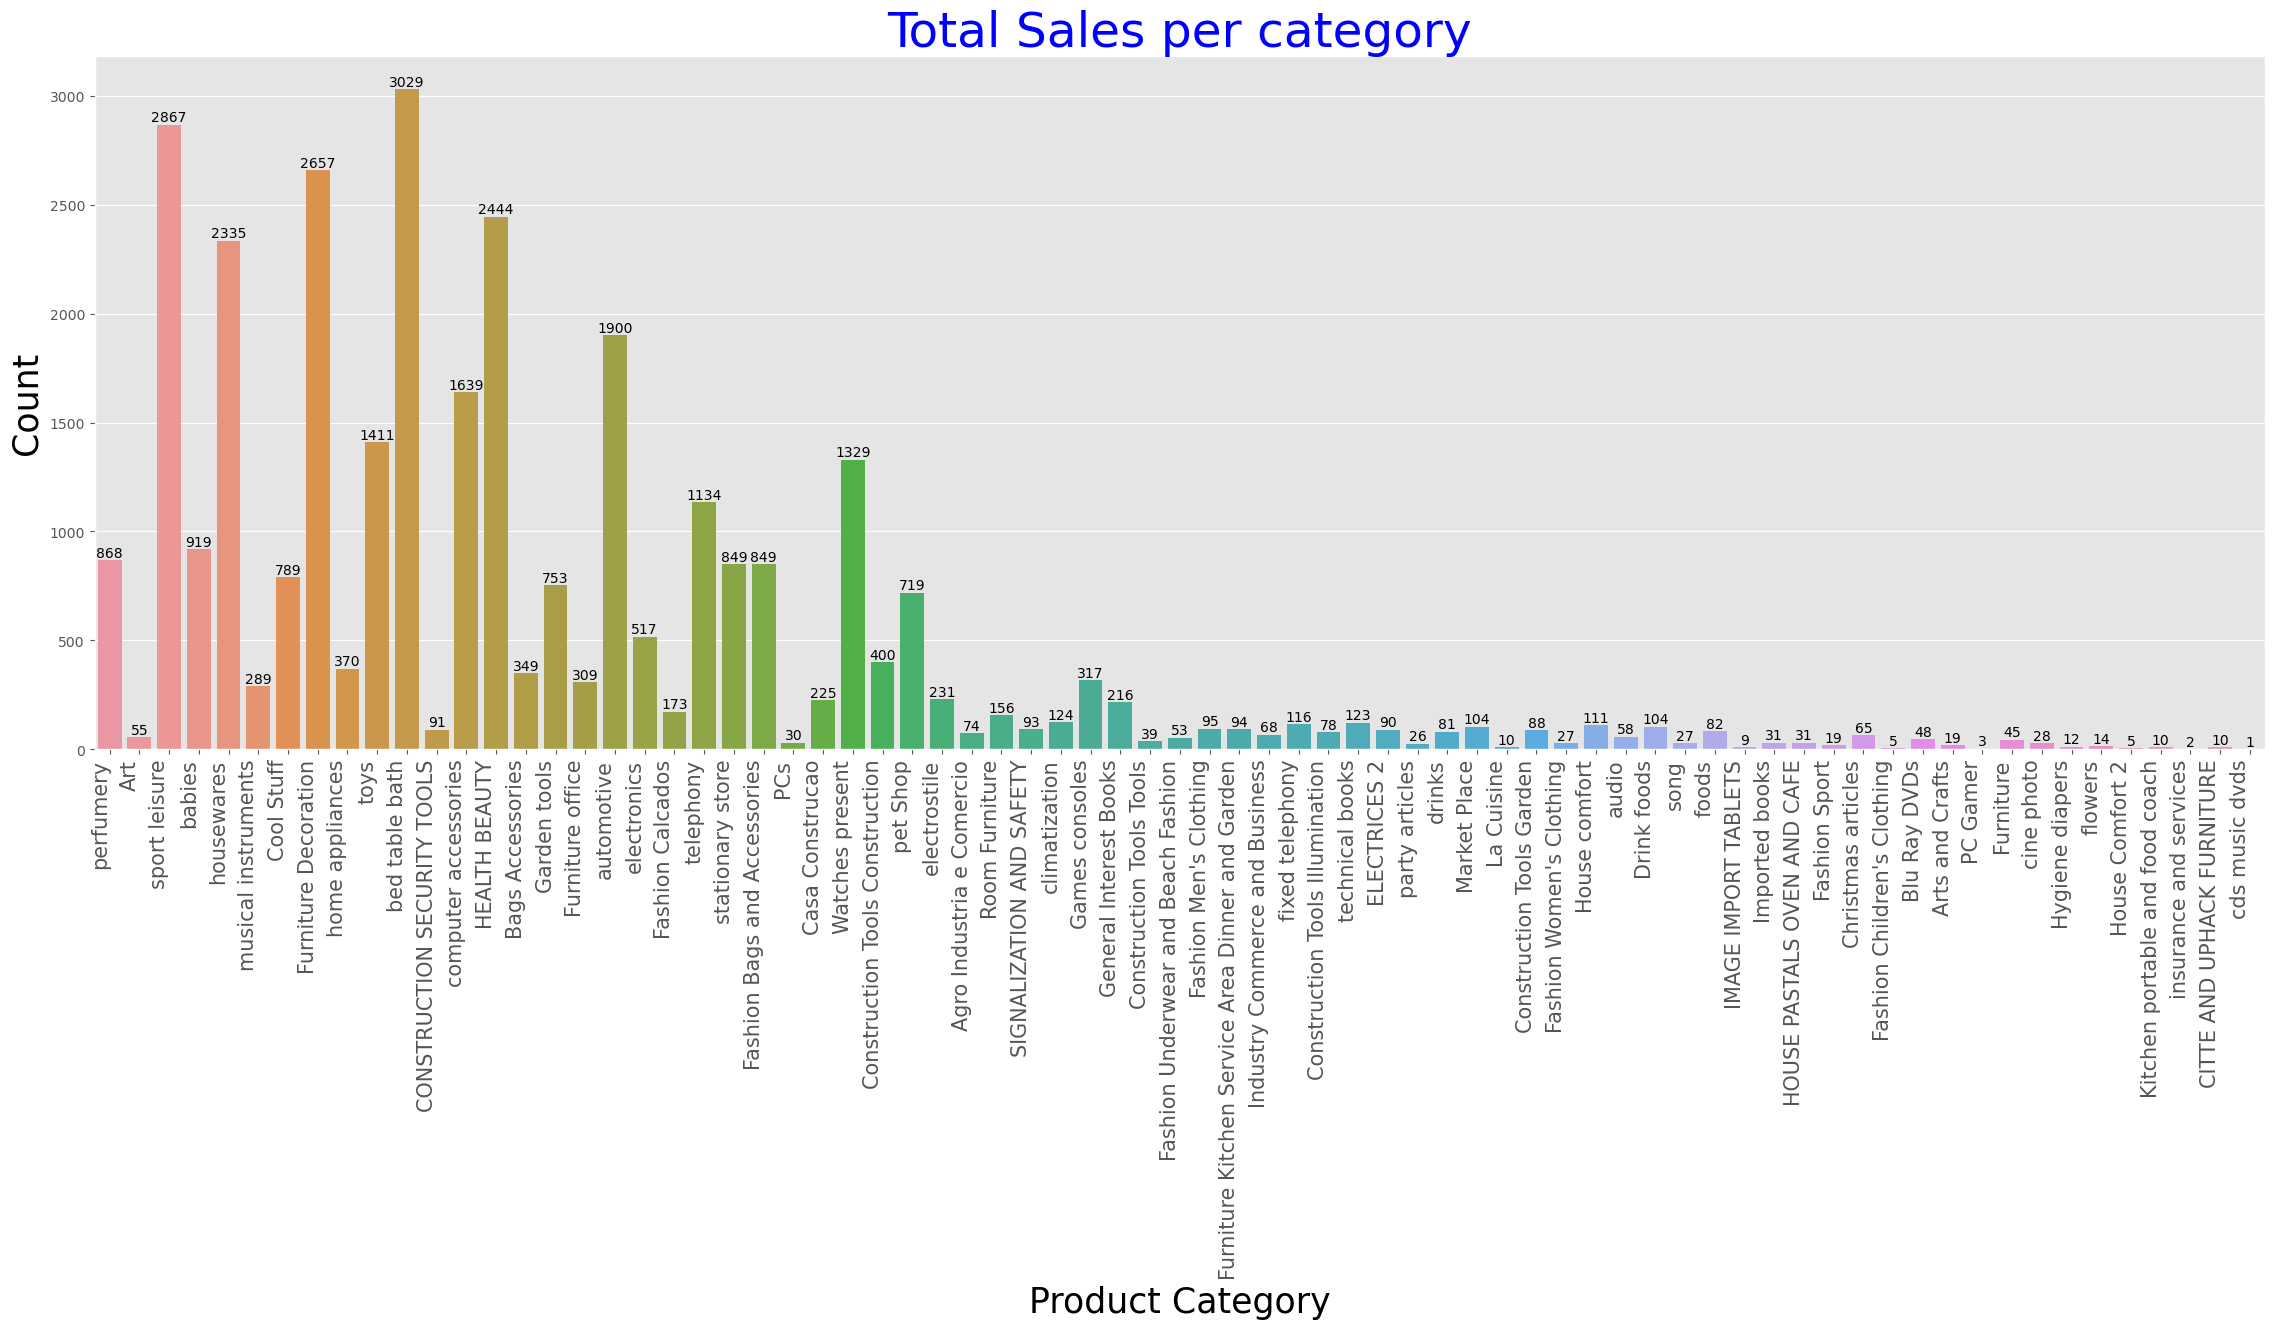

In [67]:
plt.figure(figsize=(28,9))
b=sns.countplot(x='product category',data=products)
plt.title('Total Sales per category',fontsize=35,color='blue')
plt.xticks(rotation=90,horizontalalignment='right',fontsize=15)
plt.xlabel('Product Category',fontsize=25,color='black')
plt.ylabel('Count',fontsize=25,color='black')
for bars in b.containers:
    b.bar_label(bars)

#####  Calculate the percentage of orders that were paid in each installments


In [69]:
orders_in_installments = payments[payments['payment_installments'] > 1]  

a=orders_in_installments.groupby('payment_installments')['order_id'].value_counts().reset_index(name='count')
b=a.groupby('payment_installments')['count'].sum().reset_index(name='sum')

b['order_percentage']=(b['sum'])/(b['sum'].sum())*100
b

,payment_installments,sum,order_percentage
0,2,12413,24.178971
1,3,10461,20.376719
2,4,7098,13.826016
3,5,5239,10.204916
4,6,3920,7.635669
5,7,1626,3.167245
6,8,4268,8.313530
7,9,644,1.254431
8,10,5328,10.378277
9,11,23,0.044801


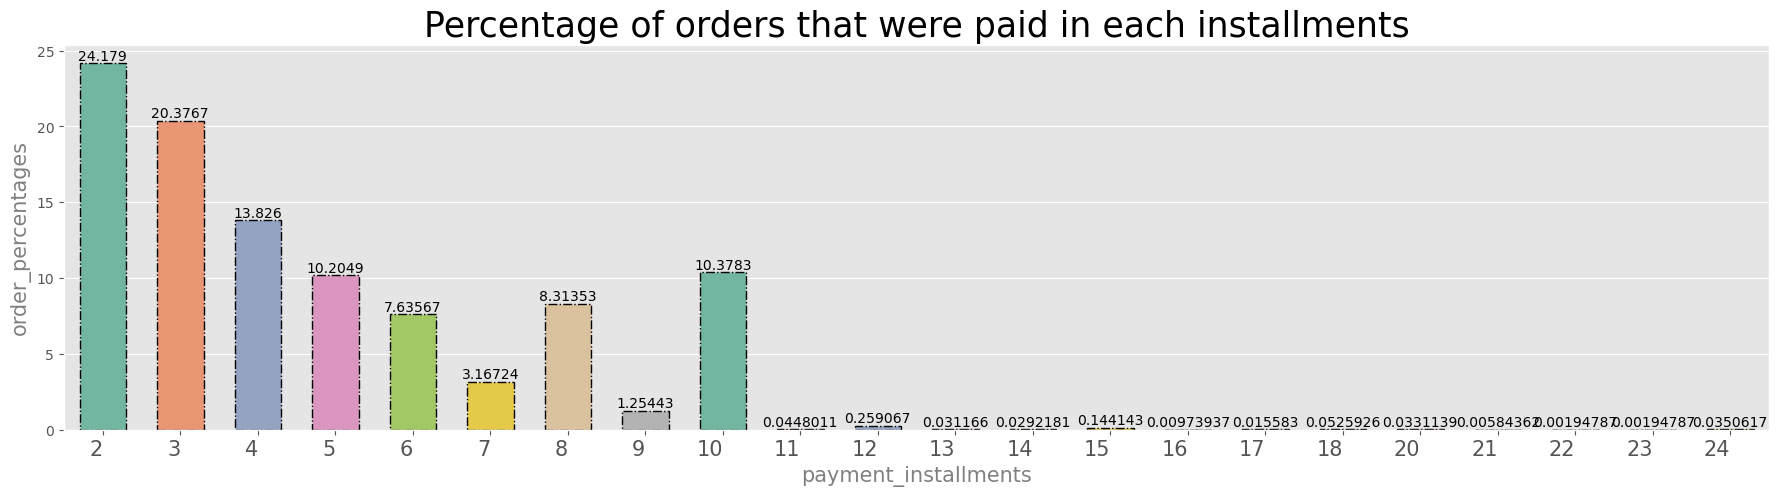

In [70]:
plt.figure(figsize=(22,5))
ax=sns.barplot(x='payment_installments',y='order_percentage',data=b,width=0.6,edgecolor='black',linewidth=1,linestyle="dashdot",palette='Set2')
plt.title('Percentage of orders that were paid in each installments',fontsize=25,color='black')
plt.xticks(horizontalalignment='right',fontsize=15)
plt.xlabel('payment_installments',fontsize=15,color='gray')
plt.ylabel('order_percentages',fontsize=15,color='gray')
for bars in ax.containers:
    ax.bar_label(bars)


#####  4. Calculate the percentage of orders that were paid in installments

In [3]:
# Calculate the number of orders paid in installments (payment_installments > 1)
orders_in_installments = payments[payments['payment_installments'] > 1].shape[0] # -->51338

# Calculate the total number of orders
total_orders = payments.shape[0]  # -->103886

# Calculate the percentage of orders paid in installments
percentage = (orders_in_installments / total_orders) * 100
# Print the percentage
print(f"Percentage of orders paid in installments: {percentage:.2f}%")

Percentage of orders paid in installments: 49.42%


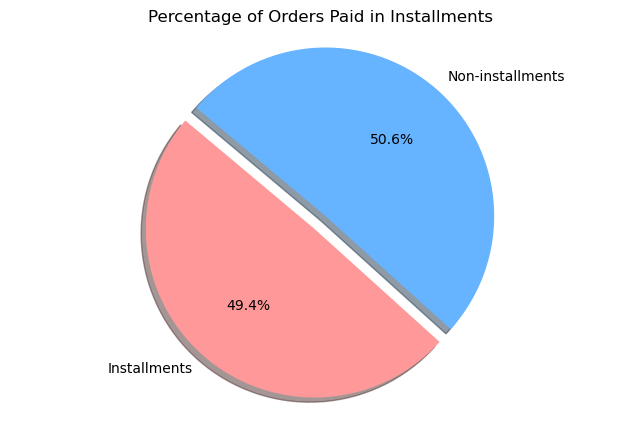

In [6]:
percentage_non_installments = 100 - percentage

# Pie chart labels and sizes
labels = ['Installments', 'Non-installments']
sizes = [percentage, percentage_non_installments]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Orders Paid in Installments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#####  5. Count the number of customers from each state.

In [72]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [73]:
customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

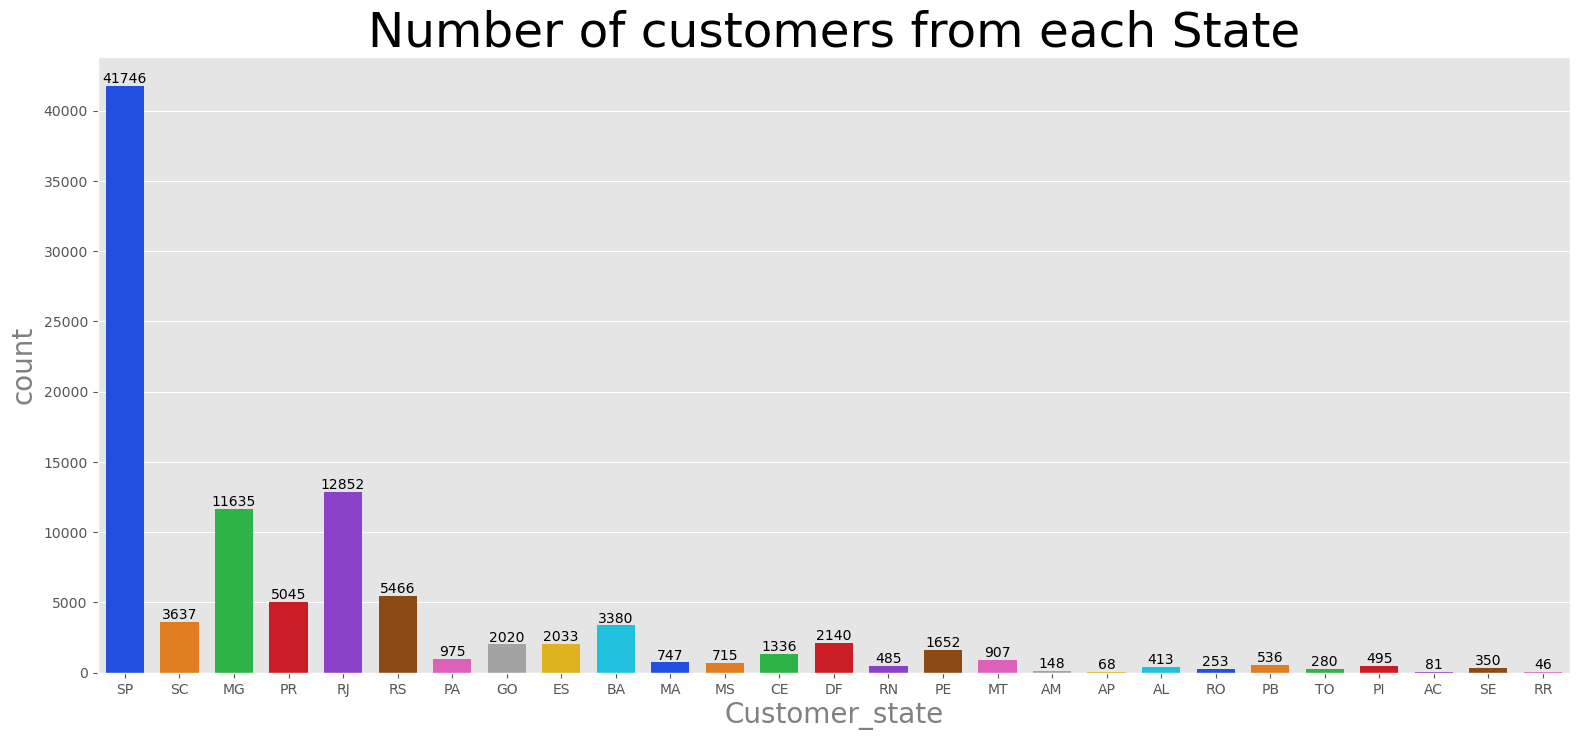

In [74]:

plt.figure(figsize=(19,8))
ax=sns.countplot(x='customer_state',data=customers,palette='bright',width=0.7)
style.use('ggplot')
plt.title('Number of customers from each State',fontsize=35,color='black')

plt.xlabel('Customer_state',fontsize=20,color='gray')
plt.ylabel('count',fontsize=20,color='gray')
for bars in ax.containers:
    ax.bar_label(bars)


#####  6. Calculate the number of orders per month in 2018.

In [75]:
#convert to datetime
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
number_of_order=orders[orders['order_purchase_timestamp'].dt.year==2018]
number_of_order_month=number_of_order.groupby(number_of_order['order_purchase_timestamp'].dt.month_name()).size().nlargest(12)
print(number_of_order_month)

order_purchase_timestamp
January      7269
March        7211
April        6939
May          6873
February     6728
August       6512
July         6292
June         6167
September      16
October         4
dtype: int64


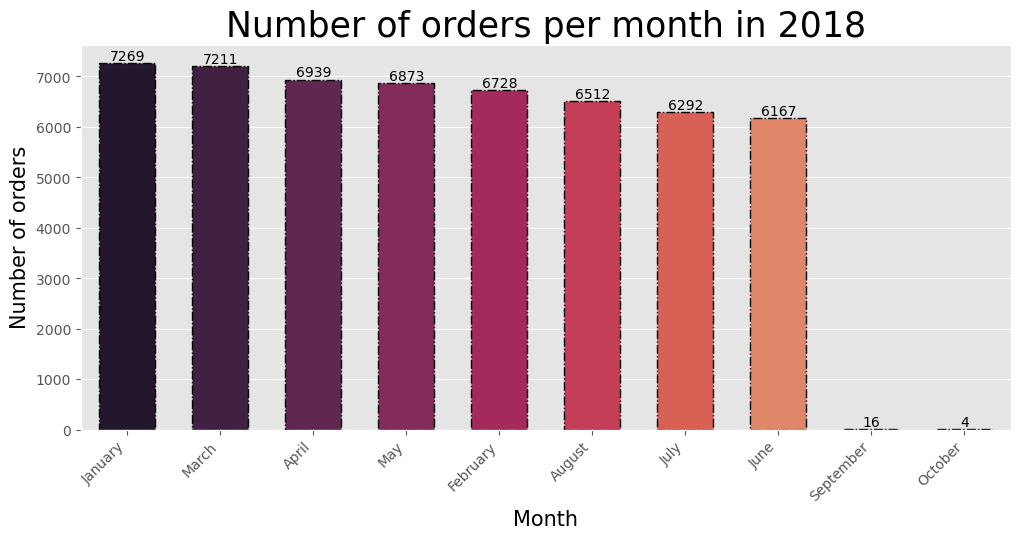

In [76]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=number_of_order_month.index,y=number_of_order_month.values,width=0.6,edgecolor='black',linewidth=1,linestyle="dashdot",palette='rocket')
plt.title('Number of orders per month in 2018',fontsize=25,color='black')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=10)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Number of orders',fontsize=15,color='black')
for bars in ax.containers:
    ax.bar_label(bars)

##### 7. Find the average number of products per order, grouped by customer city

In [77]:
# step 1: merge the orders table and customers table using customer_id column
merged_orders=pd.merge(orders,customers,on='customer_id',how='inner')

# step 2: merge the merged table and order_items table ('order_item_id','order_id','product_id') using order id column 
merged_orders=pd.merge(merged_orders,order_items[['order_item_id','order_id','product_id']],on='order_id')

# step 3:calculate the products per order
product_count=order_items.groupby('order_id').size().reset_index(name='product_count')

# step 4: merge the step 2 and step 1
products_count_merge=pd.merge(merged_orders,product_count,on='order_id')

# step 5:Find the average number of products per order, grouped by customer city¶
avg_products_per_city=products_count_merge.groupby('customer_city')["product_count"].mean().reset_index()
avg_products_per_city

,customer_city,product_count
0,abadia dos dourados,1.000000
1,abadiania,1.000000
2,abaete,1.000000
3,abaetetuba,1.571429
4,abaiara,1.000000
...,...,...
4105,xinguara,1.200000
4106,xique-xique,1.000000
4107,zacarias,1.000000
4108,ze doca,1.000000


##### 8.Calculate the percentage of total revenue contributed by each product category

In [78]:


# Step 1: Merge order_items_df with products_df on product_id
merged_df = pd.merge(order_items, products, on='product_id')

# Step 2: Calculate revenue contribution by product category
merged_df['total_revenue'] = merged_df['price'] + merged_df['freight_value']

revenue_by_category = merged_df.groupby('product category')['total_revenue'].sum().reset_index()

# Step 3: Calculate percentage of total revenue contributed by each category
total_revenue = revenue_by_category['total_revenue'].sum()  # --> 15635848.15

revenue_by_category['revenue_percentage'] = (revenue_by_category['total_revenue'] / total_revenue) * 100

# Sort by revenue_percentage descending for better visualization
revenue_by_category = revenue_by_category.sort_values(by='revenue_percentage', ascending=False)

# Display the results
print(revenue_by_category)

               product category  total_revenue  revenue_percentage
30                HEALTH BEAUTY     1441248.07            9.217588
45              Watches present     1305541.61            8.349669
49               bed table bath     1241681.72            7.941250
68                sport leisure     1156656.48            7.397466
53         computer accessories     1059272.40            6.774640
..                          ...            ...                 ...
58                      flowers        1598.91            0.010226
32              House Comfort 2        1170.58            0.007487
50               cds music dvds         954.99            0.006108
18  Fashion Children's Clothing         665.36            0.004255
62       insurance and services         324.51            0.002075

[73 rows x 3 columns]


Text(0, 0.5, 'Number of orders')

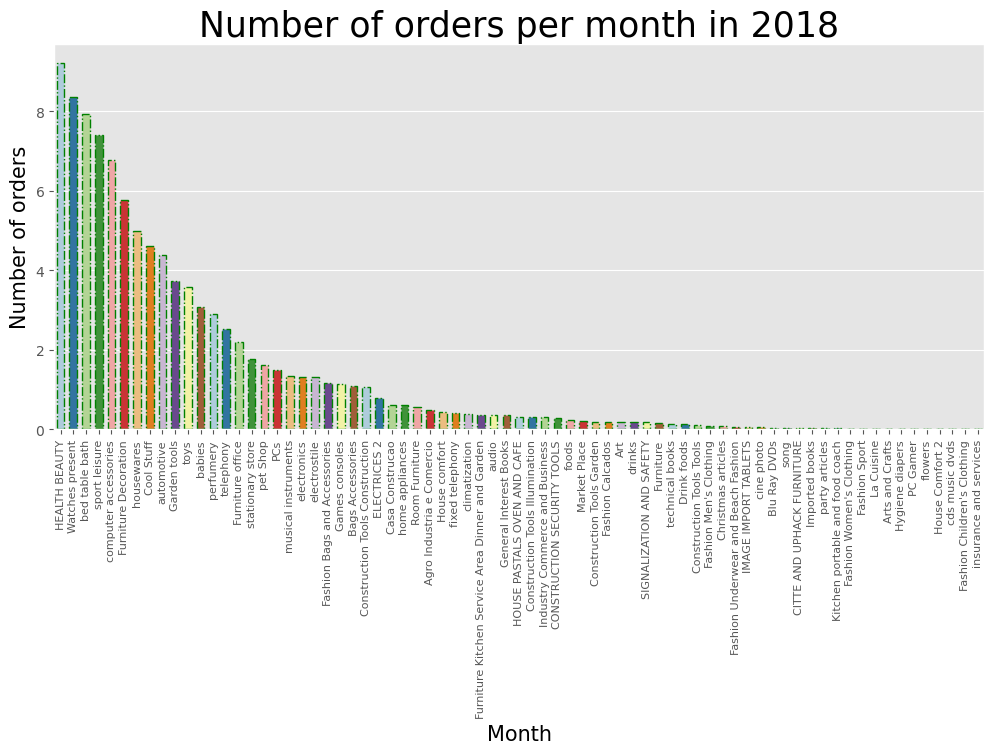

In [79]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='product category',y='revenue_percentage',data=revenue_by_category,width=0.6,edgecolor='green',linewidth=1,linestyle="dashdot",palette='Paired')

plt.title('Number of orders per month in 2018',fontsize=25,color='black')
plt.xticks(rotation=90,horizontalalignment='center',fontsize=8)

plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Number of orders',fontsize=15,color='black')


##### 9.Identify the correlation between product price and the number of times a product has been purchased.

In [80]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [81]:
order_items['product_id'].value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder


# Label encode the string column
le = LabelEncoder()
order_items['encoded_string'] = le.fit_transform(order_items['product_id'])

# Calculate correlation between float column and encoded string column
correlation = order_items['price'].corr(order_items['encoded_string'])
print(correlation)


0.011283271002288188


In [83]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

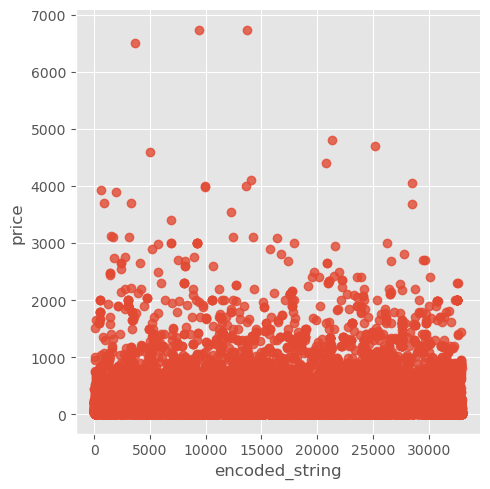

In [84]:
sns.lmplot(x='encoded_string',y='price',data=order_items)
style.use('tableau-colorblind10')

##### 10.Calculate the total revenue generated by each seller, and rank them by revenue.

In [85]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,encoded_string
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,8628
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,29597
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,25667
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15322
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,22079


In [86]:

# Step 1: Calculate total revenue for each seller
order_items['total_revenue'] = order_items['price'] + order_items['freight_value']
revenue_by_seller = order_items.groupby('seller_id')['total_revenue'].sum().reset_index()

# Step 2: Rank sellers by total revenue
revenue_by_seller = revenue_by_seller.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

# Display the results
print(revenue_by_seller)

                             seller_id  total_revenue
0     4869f7a5dfa277a7dca6462dcf3b52b2      249640.70
1     7c67e1448b00f6e969d365cea6b010ab      239536.44
2     53243585a1d6dc2643021fd1853d8905      235856.68
3     4a3ca9315b744ce9f8e9374361493884      235539.96
4     fa1c13f2614d7b5c4749cbc52fecda94      204084.73
...                                ...            ...
3090  702835e4b785b67a084280efca355756          18.56
3091  4965a7002cca77301c82d3f91b82e1a9          16.36
3092  1fa2d3def6adfa70e58c276bb64fe5bb          15.90
3093  77128dec4bec4878c37ab7d6169d6f26          15.22
3094  cf6f6bc4df3999b9c6440f124fb2f687          12.22

[3095 rows x 2 columns]


#####  11.Calculate the moving average of order values for each customer over their order history

In [102]:
import pandas as pd

# Assuming 'orders' and 'order_items' are already loaded DataFrames
# Merge orders and order_items to get total order value
merged_data = pd.merge(orders, order_items[['order_id', 'price', 'freight_value']], on='order_id', how='inner')

# Calculate total order value
merged_data['total_order_value'] = merged_data['price'] + merged_data['freight_value']


In [103]:
# Group by customer_id and calculate moving average
grouped = merged_data.groupby('customer_id')['total_order_value'].rolling(window=3, min_periods=1).mean().reset_index()


In [105]:
# Merge with customers DataFrame
result = pd.merge(customers, grouped, on='customer_id', how='left')

# Rename the column to 'moving_average'
result.rename(columns={'total_order_value': 'moving_average'}, inplace=True)

# Display the first few rows of the result
result.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,level_1,moving_average
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,100122.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,102322.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,25497.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,36459.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,79124.0,252.25


##### Calculate the cumulative sales per month for each year

In [27]:

# Step 1: Merge orders and order_items to get sales amount (price) for each order
merged_data2 = pd.merge(orders, 
                       order_items, 
                       on='order_id')

# Step 2: Convert order_purchase_timestamp to datetime format
merged_data2['order_purchase_timestamp'] = pd.to_datetime(merged_data2['order_purchase_timestamp'])
merged_data2['total_price']=merged_data2['price'] + merged_data2['freight_value']
# Step 3: Extract year and month from order_purchase_timestamp
merged_data2['year'] = merged_data2['order_purchase_timestamp'].dt.year
merged_data2['month'] = merged_data2['order_purchase_timestamp'].dt.month



In [28]:
merged = merged_data2.groupby(['year','month'])['price'].sum().reset_index()
# Step 4: Calculate cumulative sales per month for each year
merged['cumulative_sales'] = merged_data2.groupby('year')['price'].cumsum()

# Step 5: Display the results
a=merged[['year', 'month', 'cumulative_sales']].sort_values(by='cumulative_sales',ascending=False)

a

,year,month,cumulative_sales
23,2018,9,1909.44
22,2018,8,1899.94
17,2018,3,1819.95
21,2018,7,1030.46
20,2018,6,920.56
19,2018,5,844.56
18,2018,4,826.66
12,2017,10,798.67
11,2017,9,700.67
10,2017,8,601.67


In [29]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

Text(0, 0.5, 'Number of Sales')

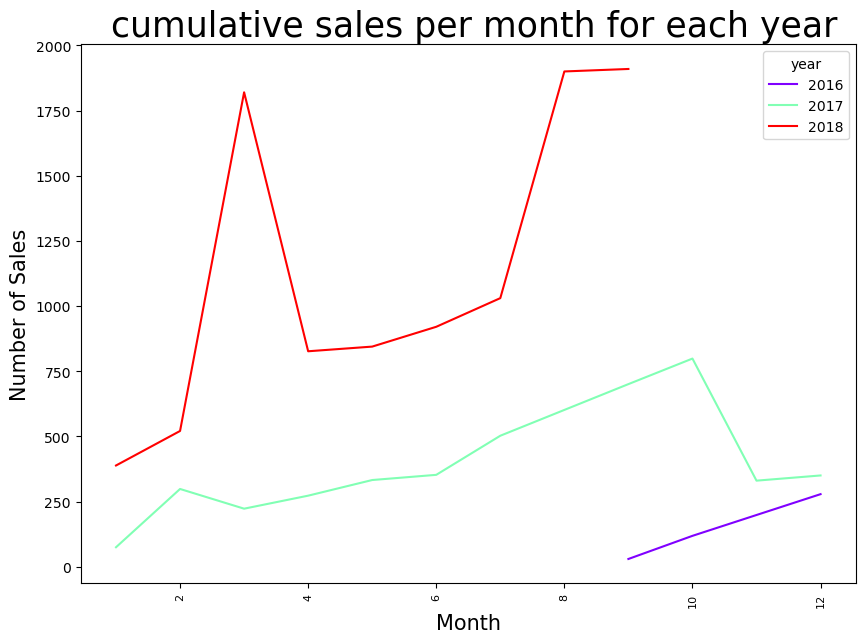

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month',y='cumulative_sales',data=a,hue='year',palette='rainbow')


plt.title(' cumulative sales per month for each year',fontsize=25,color='black')
plt.xticks(rotation=90,horizontalalignment='center',fontsize=8)

plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Number of Sales',fontsize=15,color='black')


#####  Calculate the year-over-year growth rate of total sales.

In [27]:

# Step 1: Merge orders and order_items to get sales amount (price) for each order
merged_data = pd.merge(orders[['order_id', 'order_purchase_timestamp']], 
                       order_items[['order_id', 'price']], 
                       on='order_id')

# Step 2: Convert order_purchase_timestamp to datetime format
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Step 3: Extract year from order_purchase_timestamp
merged_data['year'] = merged_data['order_purchase_timestamp'].dt.year

# Step 4: Group by year and calculate total sales
total_sales_per_year = merged_data.groupby('year')['price'].sum().reset_index()

# Step 5: Calculate year-over-year growth rate of total sales
total_sales_per_year['sales_growth_rate'] = total_sales_per_year['price'].pct_change() * 100

# Step 6: Display the results
print(total_sales_per_year[['year', 'price', 'sales_growth_rate']])


   year       price  sales_growth_rate
0  2016    49785.92                NaN
1  2017  6155806.98       12264.554035
2  2018  7386050.80          19.985094


##### . Calculate the retention rate of customers, defined as the percentage of customers who makeanother purchase within 6 months of their first purchase.

In [5]:

# step 1: Merge orders and customers on customer_id
merged_data = pd.merge(orders, customers, on='customer_id')

# step 2: Convert order_purchase_timestamp to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# step 3: Sort by customer_unique_id and order_purchase_timestamp
merged_data.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'], inplace=True)

# step 4: Group by customer_unique_id to find the first purchase timestamp
first_purchase = merged_data.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

# step 4: Calculate the cutoff date for 6 months after first purchase
first_purchase['cutoff_date'] = first_purchase['order_purchase_timestamp'] + pd.DateOffset(months=6)

# step 5 :Filter orders that are within 6 months of the first purchase
merged_data = pd.merge(merged_data, first_purchase[['customer_unique_id', 'cutoff_date']], on='customer_unique_id')
merged_data['within_6_months'] = merged_data['order_purchase_timestamp'] <= merged_data['cutoff_date']

# step 6: Count the number of customers who made a repeat purchase within 6 months
repeat_customers_count = merged_data[merged_data['within_6_months']].groupby('customer_unique_id').size().reset_index(name='repeat_count')

# step 7: Calculate total number of unique customers
total_customers = merged_data['customer_unique_id'].nunique()

# step 8: Calculate number of customers who made repeat purchases within 6 months
retained_customers = repeat_customers_count['customer_unique_id'].nunique()

# step 9:Calculate retention rate
retention_rate = (retained_customers / total_customers) * 100

print(f"Retention Rate: {retention_rate:.2f}%")


Retention Rate: 100.00%


##### Identify the top 3 customers who spent the most money in each year

In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:

# Merge orders and order_items
merged_df = pd.merge(orders, order_items, on='order_id')

# Merge with customers
merged_df = pd.merge(merged_df, customers, on='customer_id')

# Compute total spending for each order
merged_df['total_spent'] = merged_df['price'] + merged_df['freight_value']

# Convert order_purchase_timestamp to datetime and extract year
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year

# Group by year and customer_id, summing total_spent
grouped = merged_df.groupby(['year', 'customer_id', 'customer_unique_id']).agg(total_spent_year=pd.NamedAgg(column='total_spent', aggfunc='sum'))

# Reset index to make 'year' and 'customer_id' columns
grouped = grouped.reset_index()

# Rank customers within each year by total_spent_year descending
grouped['rank'] = grouped.groupby('year')['total_spent_year'].rank(method='dense', ascending=False)

# Filter for top 3 customers per year
top_customers = grouped[grouped['rank'] <= 3]



In [33]:

# Display top customers per year
for year in top_customers['year'].unique():
    print(f"Top 3 customers for {year}:")
    year_customers = top_customers[top_customers['year'] == year]
    for idx, row in year_customers.iterrows():
        print(f"Customer: {row['customer_unique_id']}, Total Spent: {row['total_spent_year']}")
    print("\n")

Top 3 customers for 2016:
Customer: 753bc5d6efa9e49a03e34cf521a9e124, Total Spent: 1400.74
Customer: b92a2e5e8a6eabcc80882c7d68b2c70b, Total Spent: 1227.78
Customer: fdaa290acb9eeacb66fa7f979baa6803, Total Spent: 1423.55


Top 3 customers for 2017:
Customer: 0a0a92112bd4c708ca5fde585afaa872, Total Spent: 13664.08
Customer: ff4159b92c40ebe40454e3e6a7c35ed6, Total Spent: 6726.66
Customer: dc4802a71eae9be1dd28f5d788ceb526, Total Spent: 6929.31


Top 3 customers for 2018:
Customer: 5d0a2980b292d049061542014e8960bf, Total Spent: 4809.44
Customer: 763c8b1c9c68a0229c42c9fc6f662b93, Total Spent: 7274.88
Customer: 459bef486812aa25204be022145caa62, Total Spent: 6922.21


